In [34]:
[link text](https://arxiv.org/pdf/1506.02158v6)

SyntaxError: invalid decimal literal (<ipython-input-34-9677910edd01>, line 1)

In [35]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'itba-cifar-100-2024-q-1:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-competitions-data%2Fkaggle-v2%2F77584%2F8490010%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240623%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240623T145828Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D5e590878a6fccc451d7f49eb5a16280dd314c45165eea77b6780d873f4d4bb0b47cdb3558b115111d316e4d64ee472d4f1882303682a89515809f06e70a052628703ce4194561b48c46db443199e14df1978b6ec8b85e02d8b51ad2a2e0aee68be302b45d021c98ba1b05612c8c15e97e828a45ad19c0d4c93729966aadedca2e34f6a80d5914cae7c34db031345f75e97e574faf2ea52cc19087380e0d48ed468d40881076983a9fbbdd68f4106730d688595da7bfa08a80257d6dc5aea692f300fa8b775903974ae132851152e8b14697134c74d6ee4312cc68173922bf5d304f01771627fad219708bc56585ffec61f21b630202e95376bd26c7fded8ce27'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')



[==================================================] 168426762 bytes downloaded
Downloaded and uncompressed: itba-cifar-100-2024-q-1
Data source import complete.


In [36]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/itba-cifar-100-2024-q-1/x_train.npy
/kaggle/input/itba-cifar-100-2024-q-1/fine_label_names.pck
/kaggle/input/itba-cifar-100-2024-q-1/y_train_coarse.npy
/kaggle/input/itba-cifar-100-2024-q-1/y_train_fine.npy
/kaggle/input/itba-cifar-100-2024-q-1/coarse_label_names.pck
/kaggle/input/itba-cifar-100-2024-q-1/x_test.npy


In [37]:
x_train = np.load("/kaggle/input/itba-cifar-100-2024-q-1/x_train.npy")/255.
x_test = np.load("/kaggle/input/itba-cifar-100-2024-q-1/x_test.npy")/255.
y_train_coarse = np.load("/kaggle/input/itba-cifar-100-2024-q-1/y_train_coarse.npy")
y_train_fine = np.load("/kaggle/input/itba-cifar-100-2024-q-1/y_train_fine.npy")
print(y_train_coarse)
print(y_train_fine)

[11 15  4 ...  8  7  1]
[19 29  0 ...  3  7 73]


In [38]:
import pickle
with open("/kaggle/input/itba-cifar-100-2024-q-1/fine_label_names.pck", "rb") as f:
    labels_fine = pickle.load(f)
with open("/kaggle/input/itba-cifar-100-2024-q-1/coarse_label_names.pck", "rb") as f:
    labels_coarse = pickle.load(f)

In [39]:
from matplotlib import pyplot as plt
#%load_ext tensorboard

[19 29  0 ...  3  7 73]


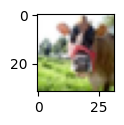

In [40]:
plt.figure(figsize=(1,1))
plt.imshow(x_train[0])

print(y_train_fine)

In [41]:
y_train_fine[0]

19

In [42]:
labels_fine[19]

'cattle'

Cross validation


In [43]:
from sklearn.model_selection import train_test_split
X_train, X_train_cv, y_train, y_train_cv = train_test_split(np.load("/kaggle/input/itba-cifar-100-2024-q-1/x_train.npy")/255.,
                                                    y_train_fine, test_size=0.2, random_state=42)

In [44]:
print(len(X_train))
print(len(X_train_cv))
print(len(y_train))
print(len(y_train_cv))

40000
10000
40000
10000


In [107]:
#Se requiere extender el dataset, se utiliza un generator donde se rotan las imagnes y se obtiene
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
    rotation_range=24,
    horizontal_flip=True,
    zoom_range=0.2,
    shear_range=0.4
)
datagen.fit(X_train)


In [108]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import SGD, Adam, RMSprop
from tensorflow.keras.regularizers import l1, l2
from tensorflow.keras.constraints import MaxNorm
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint, TensorBoard
from tensorflow.keras.initializers import GlorotNormal, GlorotUniform, RandomNormal, Constant
from  tensorflow.keras.optimizers.schedules import InverseTimeDecay

In [109]:
#X_train_flip.shape
#plt.figure(figsize=(1,1))
#plt.imshow(x_train[50000])

In [110]:
lr_schedule =InverseTimeDecay(
    0.001,
    decay_steps=1875*100,
    decay_rate=5,
    staircase=False
)

In [111]:
model = Sequential()
#Kernel initialiazer
initializer = GlorotUniform()
#First convolution
model.add(Conv2D(128, kernel_size= (3, 3) , input_shape=(32,32,3), activation = 'swish', padding= 'same'))
model.add(BatchNormalization())
model.add(Conv2D(128, kernel_size= (3, 3) , input_shape=(32,32,3), activation = 'swish', padding= 'same'))
model.add(MaxPooling2D((2, 2)))


#Second convolution
model.add(Conv2D(256, kernel_size= (3, 3) , input_shape=(32,32,3), activation = 'swish', padding= 'same'))
# model.add(Dropout(0.2)) #Agregado
model.add(Conv2D(256, kernel_size= (3, 3) , input_shape=(32,32,3), activation = 'swish', padding= 'same'))
model.add(BatchNormalization())#Agregado
model.add(MaxPooling2D((2, 2)))


#Third convolution
model.add(Conv2D(512, kernel_size= (3, 3) , input_shape=(32,32,3), activation = 'swish', padding= 'same'))
#model.add(Dropout(0.2)) #Agregado
model.add(Conv2D(512, kernel_size= (3, 3) , input_shape=(32,32,3), activation = 'swish', padding= 'same'))
model.add(BatchNormalization())#Agregado
model.add(MaxPooling2D((2, 2)))


model.add(Flatten(input_shape=(32,32,3)))

#First layer
model.add(Dense(1024, activation="swish", kernel_initializer = initializer))
model.add(Dropout(0.2))
#model.add(BatchNormalization())


#second layer
model.add(Dense(512, activation="swish", kernel_initializer = initializer))
#model.add(Dropout(0.25))
model.add(BatchNormalization())

#thrid layer
model.add(Dense(256, activation="swish", kernel_initializer = initializer))
model.add(Dropout(0.2))
#model.add(BatchNormalization())

#fourth layer
model.add(Dense(100, activation="softmax",kernel_initializer = initializer))

model.compile(loss="sparse_categorical_crossentropy", metrics = ["accuracy"], optimizer = Adam(learning_rate=0.001))

/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


In [112]:
# lr_schedule =InverseTimeDecay(
#     0.001,
#     decay_steps=1875*100,
#     decay_rate=5,
#     staircase=False
# )



rlrop = ReduceLROnPlateau(
    monitor = "val_accuracy",
    factor = 0.25,
    patience = 3,
    verbose = 1,
    min_lr = 0.5e-5
)

In [113]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_64 (Conv2D)          (None, 32, 32, 128)       3584      
                                                                 
 batch_normalization_52 (Ba  (None, 32, 32, 128)       512       
 tchNormalization)                                               
                                                                 
 conv2d_65 (Conv2D)          (None, 32, 32, 128)       147584    
                                                                 
 max_pooling2d_32 (MaxPooli  (None, 16, 16, 128)       0         
 ng2D)                                                           
                                                                 
 conv2d_66 (Conv2D)          (None, 16, 16, 256)       295168    
                                                                 
 conv2d_67 (Conv2D)          (None, 16, 16, 256)      

In [114]:
mc = ModelCheckpoint(
    "best.weights.h5",
    monitor = "val_accuracy",
    verbose = 1,
    save_best_only = True,
    save_weights_only = True,
)

In [115]:
es = EarlyStopping(
    monitor = "val_accuracy",
    patience = 8,
    verbose = 1,
    restore_best_weights = True,
)

In [116]:
tb = TensorBoard(
    log_dir="logs",
)


In [117]:
history = model.fit(
#     x = X_train_flip,
#     y= Y_train_fine_flip,
    datagen.flow(X_train, y_train, batch_size=64),
    batch_size=64,
    epochs=100,
    validation_data =(X_train_cv, y_train_cv),
    callbacks= [
        rlrop,
        es,
        mc,
        tb,
    ]
)

Epoch 1/100
625/625 [==============================] - ETA: 0s - loss: 4.0334 - accuracy: 0.0865
Epoch 1: val_accuracy improved from -inf to 0.14050, saving model to best.weights.h5
625/625 [==============================] - 51s 73ms/step - loss: 4.0334 - accuracy: 0.0865 - val_loss: 3.5973 - val_accuracy: 0.1405 - lr: 0.0010
Epoch 2/100
625/625 [==============================] - ETA: 0s - loss: 3.4048 - accuracy: 0.1788
Epoch 2: val_accuracy improved from 0.14050 to 0.20230, saving model to best.weights.h5
625/625 [==============================] - 43s 69ms/step - loss: 3.4048 - accuracy: 0.1788 - val_loss: 3.2555 - val_accuracy: 0.2023 - lr: 0.0010
Epoch 3/100
624/625 [============================>.] - ETA: 0s - loss: 3.0352 - accuracy: 0.2444
Epoch 3: val_accuracy improved from 0.20230 to 0.26490, saving model to best.weights.h5
625/625 [==============================] - 42s 67ms/step - loss: 3.0348 - accuracy: 0.2445 - val_loss: 2.9661 - val_accuracy: 0.2649 - lr: 0.0010
Epoch 4/10

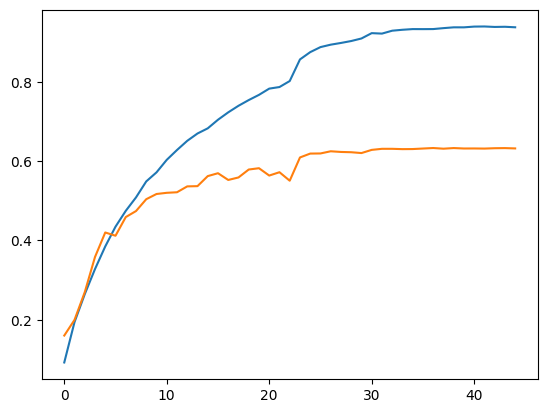

In [94]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])

In [100]:
predictions = model.predict(x_test)

#test_accuracy_prom=sum(np.array(predictions)==np.array(x_test[\"target\"]))/len(twenty_test[\"target\"])*100\n))

313/313 [==============================] - 3s 8ms/step


In [101]:
predictions = predictions.argmax(axis=1)

In [97]:
predictions

array([49, 33,  4, ..., 51, 42, 70])

In [103]:
df = pd.DataFrame(predictions, columns=["Label"])

In [104]:
df.index.name = "Id"

In [105]:
df.head()

,Label
Id,
0,49
1,33
2,4
3,51
4,71


In [106]:
df.to_csv("submission.csv")